In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Practice-Datasets .csv")
df

,Customer_ID,Age,Gender,City,Monthly_Income,Spending_Score,Purchase_Amount,Product_Category,Purchase_Date
0,1,56,Male,Delhi,112573,48,15924,Clothing,2024-01-01
1,2,46,Female,Delhi,29557,73,48607,Sports,2024-01-02
2,3,32,Female,Delhi,94971,72,45717,Sports,2024-01-03
3,4,60,Female,Delhi,123302,45,11626,Sports,2024-01-04
4,5,25,Male,Hyderabad,20162,81,35761,Groceries,2024-01-05
...,...,...,...,...,...,...,...,...,...
995,996,22,Male,Mumbai,48398,38,4783,Furniture,2026-09-22
996,997,40,Male,Chennai,71971,19,5298,Furniture,2026-09-23
997,998,27,Female,Hyderabad,61862,36,5668,Electronics,2026-09-24
998,999,61,Male,Chennai,118668,59,21671,Sports,2026-09-25


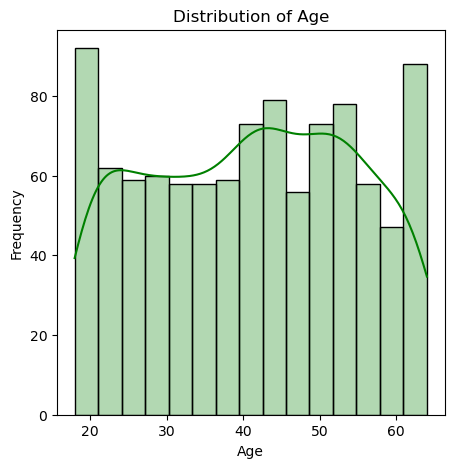

In [3]:
#1. Create a histogram to analyze the distribution of Age
plt.figure(figsize=(5,5))
sns.histplot(df['Age'], kde=True, bins=15,color='green', edgecolor='black',  alpha=0.3)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

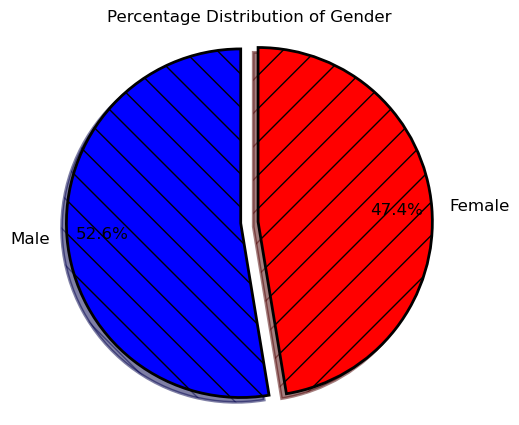

In [4]:
#2. Plot a pie chart showing the percentage distribution of Gender.
plt.figure(figsize=(5,5))
x=df['Gender'].value_counts()
autopct = '%1.1f%%'
explode=(0.1,0)
labels=['Male','Female']
colors=['blue','red']
pctdistance = 0.8
shadow=True
labeldistance=1.1
startangle=90
radius=1
wedgeprops={'edgecolor':'black','linewidth':2}
textprops={'fontsize':12,'color':'black'}
center=(0,0)
frame=False
hatch=['\\','/']
plt.pie(x,explode=explode,
        labels=labels,
         colors=colors,
        autopct=autopct,
         pctdistance=pctdistance,
        shadow=shadow,
            labeldistance=labeldistance,
        startangle=startangle,
            radius=radius,
        wedgeprops=wedgeprops,
            textprops=textprops,
        center=center,
            frame=frame,hatch=hatch)
plt.title("Percentage Distribution of Gender")
plt.axis('equal')
plt.show()

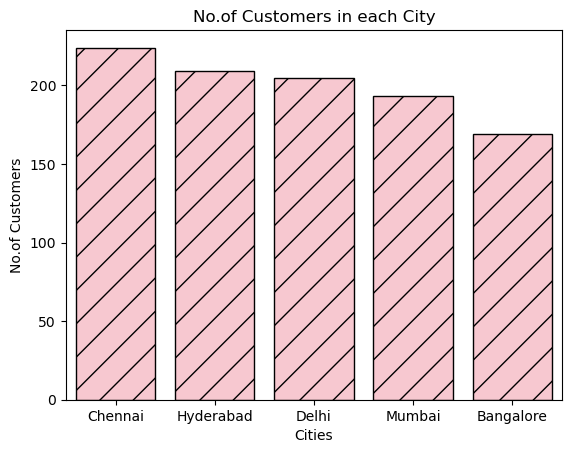

In [5]:
#3. Create a bar chart showing the number of customers in each City.figure(figsize=(5,5))
city_counts =df['City'].value_counts()
sns.barplot(x=city_counts.index,y=city_counts.values,width=0.8,color='pink',edgecolor='black',linewidth=1,alpha=1,hatch='/')
plt.title("No.of Customers in each City")
plt.xlabel("Cities")
plt.ylabel("No.of Customers")
plt.show()

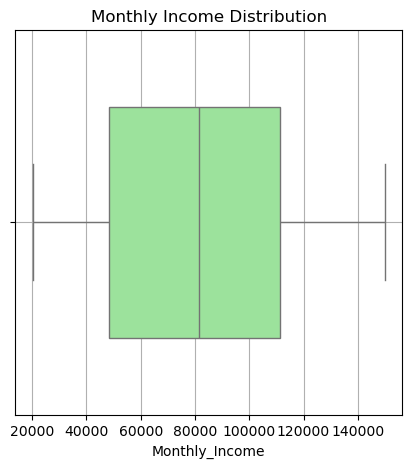

In [6]:
#4. Plot a box plot to analyze Monthly Income distribution.
plt.figure(figsize=(5,5))
sns.boxplot(x='Monthly_Income',data=df,color='lightgreen',width=0.6)
plt.title("Monthly Income Distribution")
plt.grid(True)
plt.show()

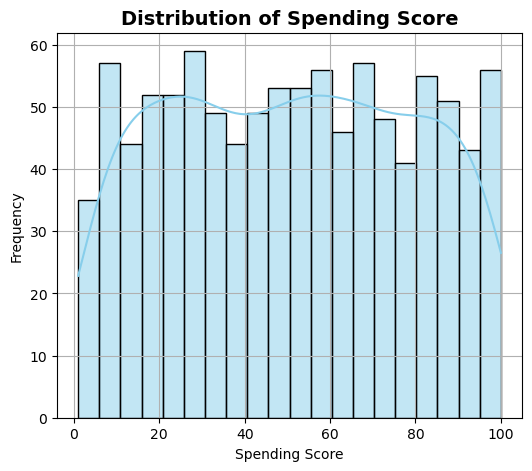

In [7]:
#5. Create a histogram of Spending Score and interpret the skewness.
plt.figure(figsize=(6,5))
sns.histplot(df['Spending_Score'],
             bins=20,
             kde=True,
             color='skyblue',
             edgecolor='black')

plt.title("Distribution of Spending Score", fontsize=14, fontweight='bold')
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

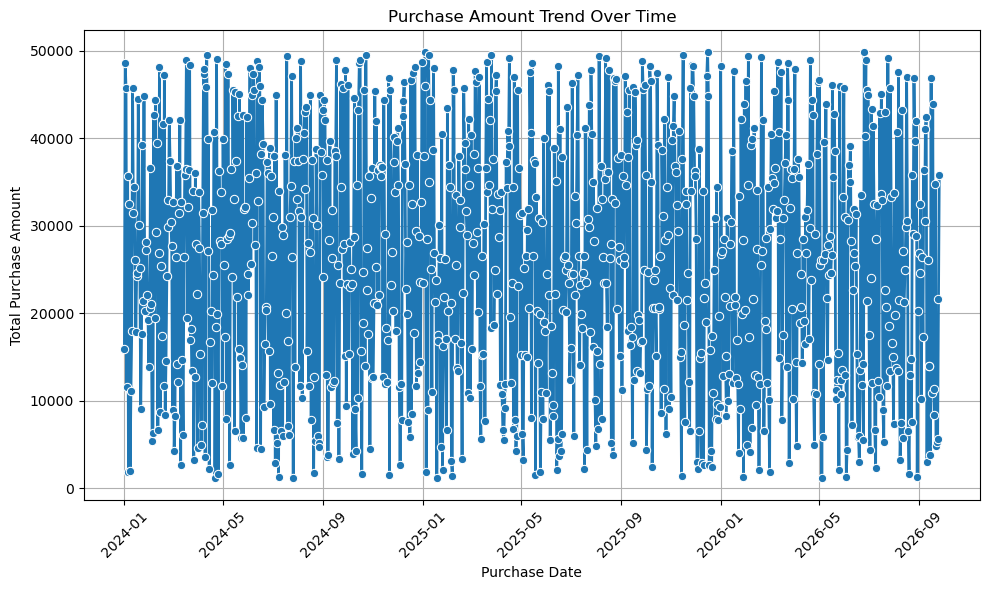

In [8]:
#6. Plot a line chart to visualize Purchase Amount trend over Purchase Date.
# Convert Purchase Date to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

# Sort data by date
df = df.sort_values('Purchase_Date')

# If multiple purchases per day, group by date
daily_sales = df.groupby('Purchase_Date')['Purchase_Amount'].sum()

# Plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_sales.index,y=daily_sales.values, marker='o', linestyle='-', linewidth=2)

plt.title('Purchase Amount Trend Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

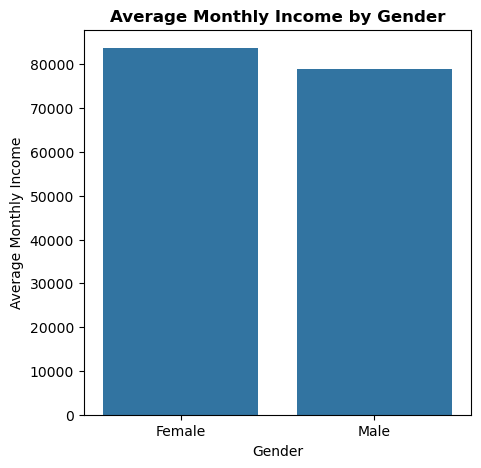

In [9]:
#7. Create a bar plot to compare average Monthly Income by Gender.
plt.figure(figsize=(5,5))
avg_income = df.groupby('Gender',as_index=False)['Monthly_Income'].mean()
sns.barplot(data=avg_income,x='Gender',y='Monthly_Income')
plt.title('Average Monthly Income by Gender',fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Average Monthly Income')
plt.show()

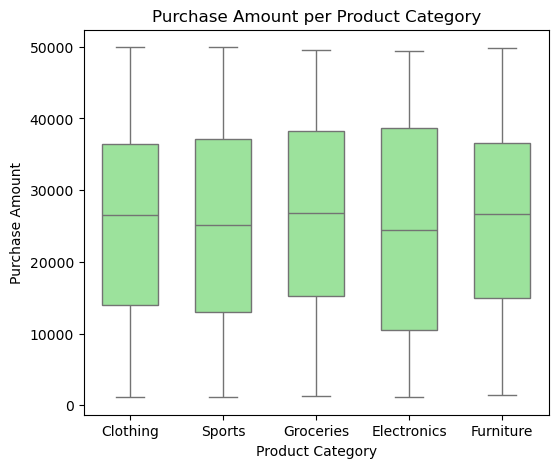

In [10]:
#8. Plot a box plot of Purchase Amount grouped by Product Category.
plt.figure(figsize=(6,5))
sns.boxplot(data=df,
            x='Product_Category',
            y='Purchase_Amount',
            color='lightgreen',
            width=0.6)

plt.title('Purchase Amount per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.show()

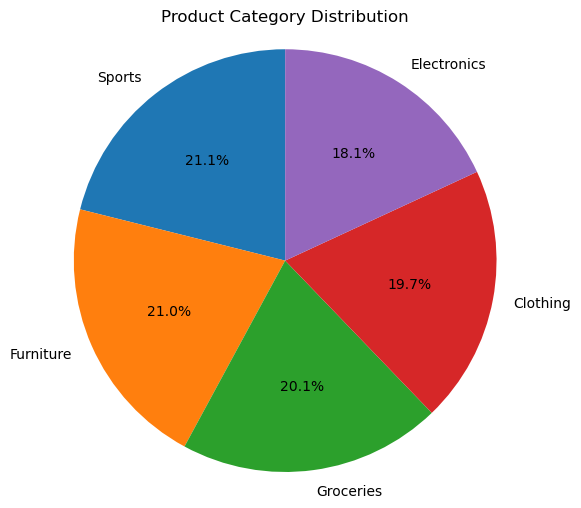

In [11]:
#9. Create a pie chart to show Product Category distribution.
import matplotlib.pyplot as plt
# Count product category occurrences
category_counts = df['Product_Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Product Category Distribution')
plt.axis('equal')
plt.show()

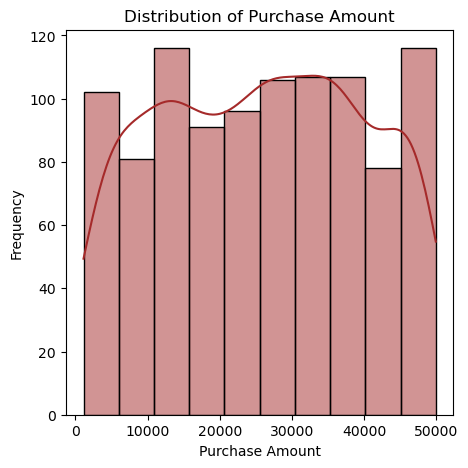

In [12]:
#10. Plot a histogram of Purchase Amount with appropriate bin size.
plt.figure(figsize=(5,5))
sns.histplot(data=df,x='Purchase_Amount',bins=10,kde=True,color='brown')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

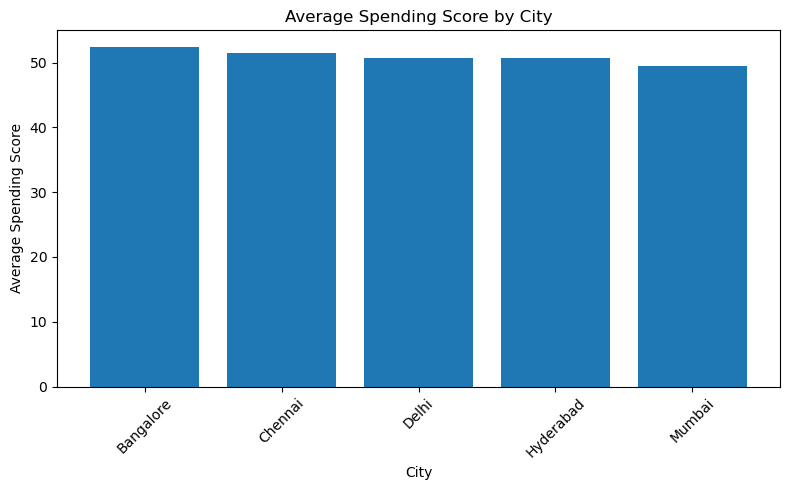

In [13]:
#11. Create a bar chart showing average Spending Score by City.
# Calculate average spending score by city
avg_spending = df.groupby('City')['Spending_Score'].mean()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(avg_spending.index, avg_spending.values)

plt.title('Average Spending Score by City')
plt.xlabel('City')
plt.ylabel('Average Spending Score')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

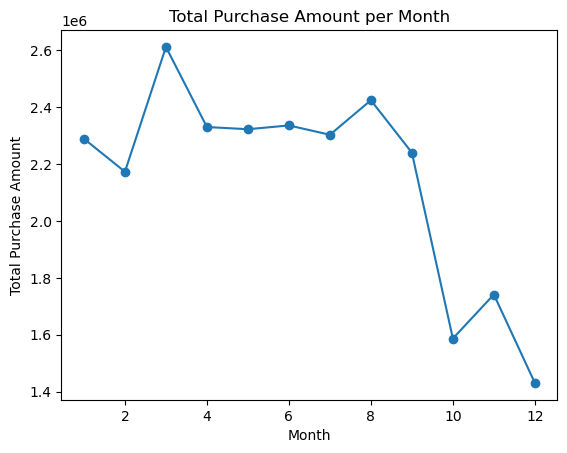

In [14]:
#12. Plot a line chart showing total Purchase Amount per month.
import matplotlib.pyplot as plt

# Convert to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

# Group by month and calculate total purchase amount
monthly_sales = df.groupby(df['Purchase_Date'].dt.month)['Purchase_Amount'].sum()

# Plot line chart
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Total Purchase Amount per Month')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.show()

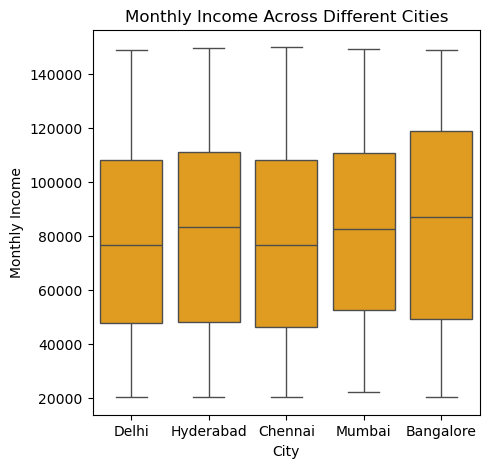

In [15]:
#13. Create a box plot comparing Monthly Income across different Cities.
plt.figure(figsize=(5,5))

sns.boxplot(data=df,
            x='City',
            y='Monthly_Income',
            color='orange')

plt.title('Monthly Income Across Different Cities')
plt.xlabel('City')
plt.ylabel('Monthly Income')
plt.show()

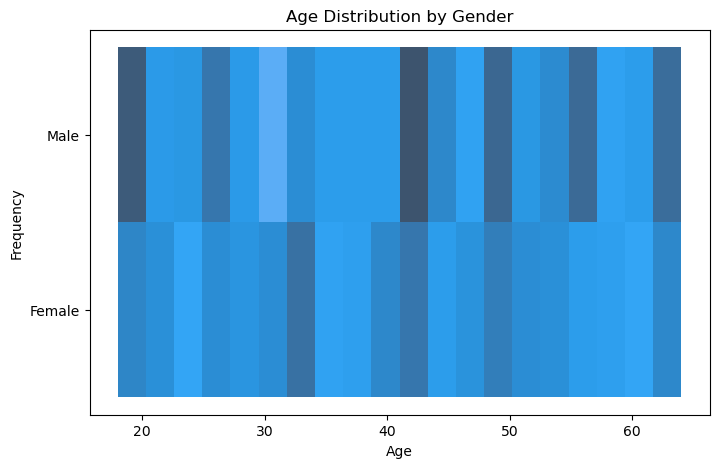

In [16]:
#14. Plot a histogram to analyze Age distribution by Gender.
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='Age',y='Gender',bins=20,kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

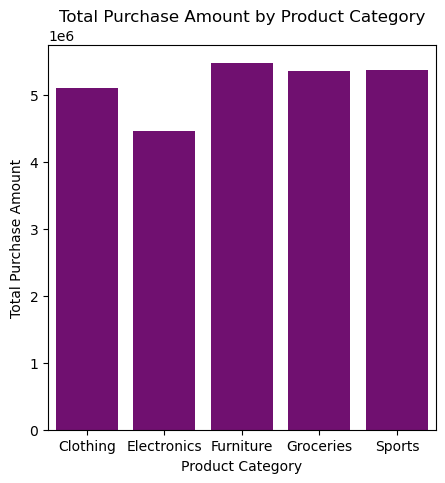

In [17]:
#15. Create a bar chart showing total Purchase Amount by Product Category.
# Calculate total purchase amount by product category
total_purchase = df.groupby('Product_Category')['Purchase_Amount'].sum()

plt.figure(figsize=(5,5))
sns.barplot(x=total_purchase.index,y=total_purchase.values,color='purple')
plt.title('Total Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.show()

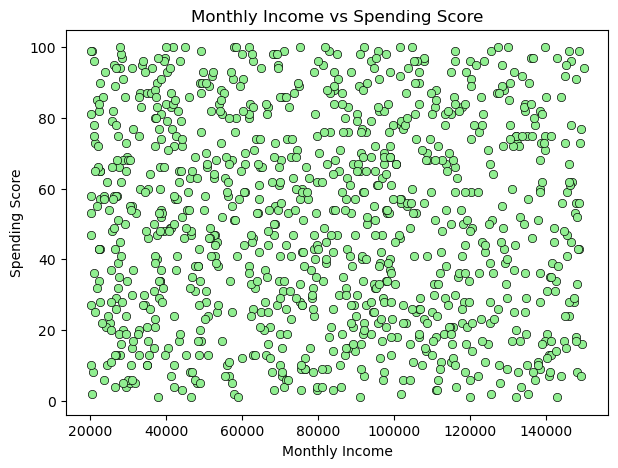

In [18]:
#16. Plot a scatter plot between Monthly Income and Spending Score.
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Monthly_Income',y='Spending_Score',color='lightgreen',edgecolor='black')
plt.title('Monthly Income vs Spending Score')
plt.xlabel('Monthly Income')
plt.ylabel('Spending Score')
plt.show()

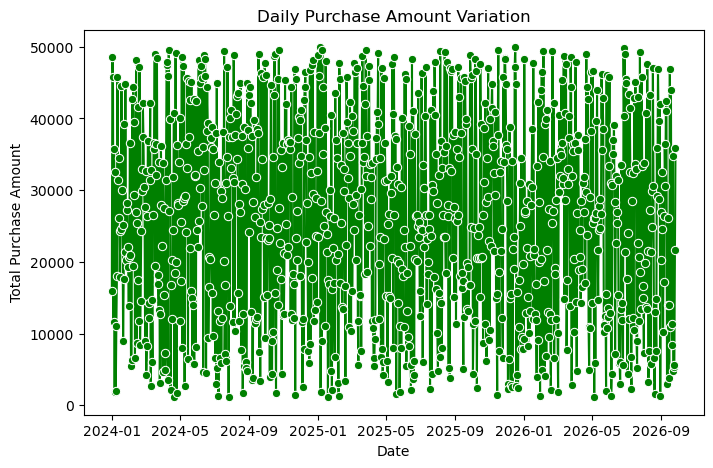

In [19]:
#17. Create a line chart to visualize daily Purchase Amount variation.
# Convert to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

# Group by date and calculate total purchase per day
daily_sales = df.groupby('Purchase_Date', as_index=False)['Purchase_Amount'].sum()

plt.figure(figsize=(8,5))

sns.lineplot(data=daily_sales,
             x='Purchase_Date',
             y='Purchase_Amount',
             color='green',
             marker='o')

plt.title('Daily Purchase Amount Variation')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.show()

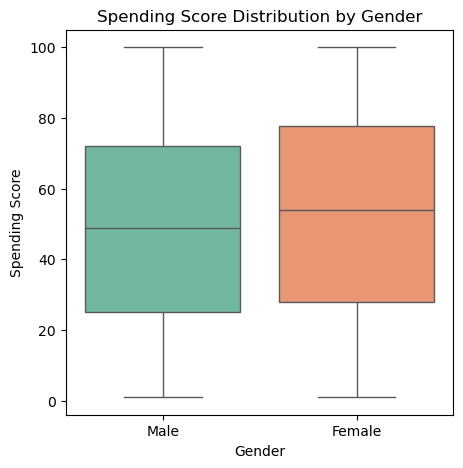

In [20]:
#18. Plot a box plot of Spending Score grouped by Gender.
plt.figure(figsize=(5,5))

sns.boxplot(data=df,
            x='Gender',
            y='Spending_Score',
            hue='Gender',
            palette='Set2'
           )

plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')

plt.show()

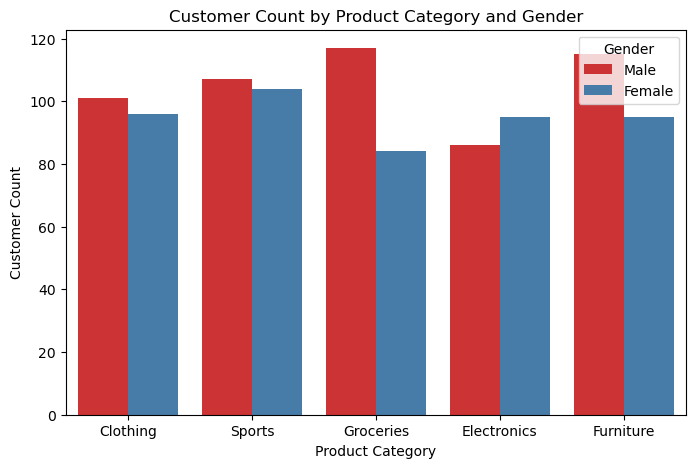

In [21]:
#19. Create a bar chart showing customer count by Product Category and Gender.
plt.figure(figsize=(8,5))

sns.countplot(data=df,
              x='Product_Category',
              hue='Gender',
              palette='Set1')

plt.title('Customer Count by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
#20. Analyze the relationship between Age and Purchase Amount using a suitable visualization.
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,
                x='Age',
                y='Purchase_Amount',
                color='green')

plt.title('Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()